
1. Suivant le graphe (Graphe_) définit précédemment, écrire les fonctions permettant de parcourir tous les nœuds de ce graphe, décrire ce que fait réellement votre fonction.

2.Trouver 2 manière de parcourir un graphe de A à G. Quelle est la longueur de votre parcours

3. Proposer une fonction qui permet de passer en argument "de quel point à quel point" on souhaite aller et une fonction qui permet d'afficher par quel point l'algorithme est allé, et quelle distance le parcours de l'algorithme représente.

3. Un algorithme appelé "Dijkstra" permet de résoudre ce type de problème dans les graphes pondérés connexes et à pondérations positives. Implémenter cet algorithme.


In [3]:
Graphe_ = { }
Graphe_['A']= {'B': 2,'C':1}
Graphe_['B']= {'A': 2,'C':2,'D': 1,'E':3}
Graphe_['C']= {'A': 1,'B':2, 'D': 4,'E':3 , 'F':5}
Graphe_['D']= {'B': 1 , 'C': 4,'E':3 , 'F':6 , 'G':5}
Graphe_['E']= {'B': 3 , 'C': 3,'D':3 , 'F': 1}
Graphe_['F']= {'C': 5 , 'D': 6,'E':1 , 'G': 2}
Graphe_['G']= {'D': 5,'F': 2 }
Graphe_


{'A': {'B': 2, 'C': 1},
 'B': {'A': 2, 'C': 2, 'D': 1, 'E': 3},
 'C': {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5},
 'D': {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5},
 'E': {'B': 3, 'C': 3, 'D': 3, 'F': 1},
 'F': {'C': 5, 'D': 6, 'E': 1, 'G': 2},
 'G': {'D': 5, 'F': 2}}

1. Suivant le graphe (Graphe_) définit précédemment, écrire les fonctions permettant de parcourir tous les nœuds de ce graphe, décrire ce que fait réellement votre fonction.

In [4]:
# parcourir les noeuds et afficher les values 
def ParcourirG(G):
    for noeud in G.keys():
        print (noeud , ":", G[noeud] )
    
ParcourirG(Graphe_)   

A : {'B': 2, 'C': 1}
B : {'A': 2, 'C': 2, 'D': 1, 'E': 3}
C : {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5}
D : {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5}
E : {'B': 3, 'C': 3, 'D': 3, 'F': 1}
F : {'C': 5, 'D': 6, 'E': 1, 'G': 2}
G : {'D': 5, 'F': 2}


2.Trouver 2 manière de parcourir un graphe de A à G. Quelle est la longueur de votre parcours


In [21]:
# exploration en profondeur 

s_explore = []

def dfs_rec (graphe, s):
  # 1eme :  explorer le sommet 's' 
    if s not in s_explore:
        s_explore.append(s)
        print(s)
   #2eme : explorer ses voisins    
    for voisin in graphe[s]:
        if voisin not in s_explore:
            # 3 : explorer les fils
            dfs_rec(graphe, voisin)
    #print("back") #garder une trace des retours en arrières
        
dfs_rec (Graphe_, 'G')

G
D
B
A
C
E
F


In [5]:
# BFS d'une manière interactive
from collections import deque

def iterative_bfs(graph, start):

    visited = []
    # céer une file  
    queue = deque()
    queue.append(start)

    while queue:  # tant que la file est non vide
        node = queue.popleft() # s = f.defiler()
        if node not in visited:
            visited.append(node)
            unvisited = [n for n in graph[node] if n not in visited]
            queue.extend(unvisited)

    return visited

ParcoursLargeur(Graphe G, Sommet s):
       f = CreerFile();
       f.enfiler(s);
       marquer(s);
       tant que la file est non vide
                s = f.defiler();
                afficher(s);
                pour tout voisin t de s dans G
                         si t non marqué
                                 f.enfiler(t);
                                 marquer(t);


In [241]:
iterative_bfs(Graphe_ ,'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [6]:
#2eme recursive_dfs
def recursive_dfs(graph, start, path=[]):
    
#recursive depth first search from start
    path=path+[start]
    for node in graph[start]:
        if not node in path:
            path=recursive_dfs(graph, node, path)
    return path
recursive_dfs(Graphe_,'B', path=[])

['B', 'A', 'C', 'D', 'E', 'F', 'G']

In [7]:
recursive_dfs(Graphe_,'E', path=[])

['E', 'B', 'A', 'C', 'D', 'F', 'G']

In [23]:
s_explore = []
dfs_rec (Graphe_, 'E')

E
B
A
C
D
F
G


In [13]:
iterative_bfs(Graphe_ ,'E')

['E', 'B', 'C', 'D', 'F', 'A', 'G']

In [27]:
 min(Graphe_['A'], key = Graphe_['A'].get)

'C'

In [40]:
Graphe_.get('E','defaut')

{'B': 3, 'C': 3, 'D': 3, 'F': 1}

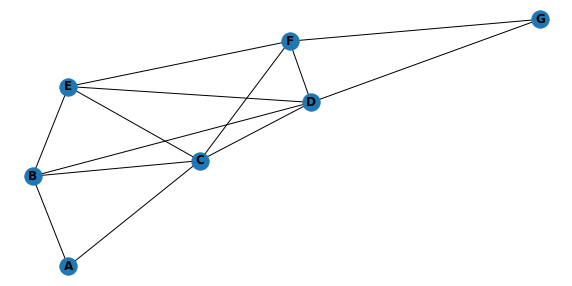

In [32]:
import networkx as nx
g = nx.Graph()
for i, j in Graphe_.items():
    for k in j:
        g.add_edge( i,k )
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

In [36]:
def affiche_peres(pere,depart,extremite,trajet):
    """
    À partir du dictionnaire des pères de chaque sommet on renvoie
    la liste des sommets du plus court chemin trouvé. Calcul récursif.
    On part de la fin et on remonte vers le départ du chemin.
    
    """
    if extremite == depart:
        return [depart] + trajet
    else:
        return (affiche_peres(pere, depart, pere[extremite], [extremite] + trajet))

In [70]:
def plus_court(graphe,etape,fin,visites,dist,pere,depart):
    """
    Trouve récursivement la plus courte chaine entre debut et fin avec l'algo de Dijkstra
    visites est une liste et dist et pere des dictionnaires 
    graphe  : le graphe étudié                                                               (dictionnaire)
    étape   : le sommet en cours d'étude                                                     (sommet)
    fin     : but du trajet                                                                  (sommet)
    visites : liste des sommets déjà visités                                                 (liste de sommets)
    dist    : dictionnaire meilleure distance actuelle entre départ et les sommets du graphe (dict sommet : int)
    pere    : dictionnaire des pères actuels des sommets correspondant aux meilleurs chemins (dict sommet : sommet)
    depart  : sommet global de départ                                                        (sommet)
    Retourne le couple (longueur mini (int), trajet correspondant (liste sommets)) 
       
    """
    # si on arrive à la fin, on affiche la distance et les peres
    if etape == fin:
        return dist[fin], affiche_peres(pere,depart,fin,[])
    # si c'est la première visite, c'est que l'étape actuelle est le départ : on met dist[etape] à 0
    if  len(visites) == 0 : dist[etape]=0
    # on commence à tester les voisins non visités
    for voisin in graphe[etape]:
        if voisin not in visites:
            # la distance est soit la distance calculée précédemment soit l'infini
            dist_voisin = dist.get(voisin,float('inf'))
            # on calcule la nouvelle distance calculée en passant par l'étape
            candidat_dist = dist[etape] + graphe[etape][voisin]
            # on effectue les changements si cela donne un chemin plus court
            if candidat_dist < dist_voisin:
                dist[voisin] = candidat_dist
                pere[voisin] = etape
    # on a regardé tous les voisins : le noeud entier est visité
    visites.append(etape)
    # on cherche le sommet *non visité* le plus proche du départ
    non_visites = dict((s, dist.get(s,float('inf'))) for s in graphe if s not in visites)
    noeud_plus_proche = min(non_visites, key = non_visites.get)
    # on applique récursivement en prenant comme nouvelle étape le sommet le plus proche 
    return plus_court(graphe,noeud_plus_proche,fin,visites,dist,pere,depart)

In [71]:
def dij_rec(graphe,debut,fin):
    return plus_court(graphe,debut,fin,[],{},{},debut)
 
l,c = dij_rec(Graphe_,'A','F')

In [58]:
l,c = dij_rec(Graphe_,'A','E')
print ('Plus court chemin : ',c, ' de longueur :',l)

Plus court chemin :  ['A', 'C', 'E']  de longueur : 4
